# Pandas Intermediate 2

**Description:** This notebook describes how to:
* Work with time series data in Pandas
* Use `.plot()` to make different kinds of static charts

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Knowledge Required:** 
* Python Basics ([Start Python Basics I](../basic/python-basics-1.ipynb))
* Pandas Basics ([Start Pandas Basics I](./pandas-1.ipynb))

**Knowledge Recommended:** 
* [Python Intermediate 2](../intermediate/python-intermediate-2.ipynb)
* [Python Intermediate 4](../intermediate/python-intermediate-4.ipynb)

**Completion Time:** 90 minutes

**Data Format:** csv

**Libraries Used:** Pandas

**Research Pipeline:** None
___

In [1]:
# import Pandas, `as pd` allows us to shorten typing pandas to pd
import pandas as pd

## Times series data

Time-series data is everywhere. You see it used in public health record, weather records and many other places. Pandas library provides a comprehensive framework for working with times, dates, and time-series data.

In real life, we often find datasets where dates and times are stored as strings. 

In [2]:
import urllib
from pathlib import Path

# Check if a data folder exists. If not, create it.
data_folder = Path('../data/')
data_folder.mkdir(exist_ok=True)

# Download the sample files
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/Pandas1_failed_banks_since_2000.csv'
file = '../data/failed_banks.csv'
urllib.request.urlretrieve(url, file)
print('Sample file ready.')

# Read in the data
banks_df = pd.read_csv(file)
banks_df

Sample file ready.


,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
2,Silicon Valley Bank,Santa Clara,CA,24735,First Citizens Bank & Trust Company,10-Mar-23,10539
3,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",16-Oct-20,10537
...,...,...,...,...,...,...,...
561,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,6004
562,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,4648
563,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,4647
564,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,4646


In [3]:
# check the data type of the Closing Date column
banks_df['Closing Date']

0       1-May-23
1      12-Mar-23
2      10-Mar-23
3      23-Oct-20
4      16-Oct-20
         ...    
561    27-Jul-01
562     3-May-01
563     2-Feb-01
564    14-Dec-00
565    13-Oct-00
Name: Closing Date, Length: 566, dtype: object

As you can see, the dates in the `Closing Date` column are strings. We can convert the data type to `datetime` using the `to_datetime()` function in Pandas. The strings in this column will be turned into `datetime` objects. 

## The datetime objects

In [4]:
# convert the strings to datetime
banks_df['Closing Date'] = pd.to_datetime(banks_df['Closing Date'], format='%d-%b-%y')

In [5]:
# check the data type of the Closing Date column
banks_df['Closing Date']

0     2023-05-01
1     2023-03-12
2     2023-03-10
3     2020-10-23
4     2020-10-16
         ...    
561   2001-07-27
562   2001-05-03
563   2001-02-02
564   2000-12-14
565   2000-10-13
Name: Closing Date, Length: 566, dtype: datetime64[ns]

When we parse the strings in the `Closing Date` column into `datetime` objects, we specify a format to inform Pandas of how to do the parsing. For the cheatsheet of the format codes, you can check the documentation [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

One good thing about converting the dates and times into `datetime` objects is that we can then use them to index a dataframe. You will soon see that indexing using `datetime` objects is very flexible. 

In [6]:
# set the index to Closing Date
banks_df = banks_df.set_index('Closing Date').sort_index()

In [7]:
# select data between two dates
banks_df.loc['2020-01-01':'2023-07-01']

,Bank Name,City,State,Cert,Acquiring Institution,Fund
Closing Date,,,,,,
2020-02-14,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,10535
2020-04-03,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",10536
2020-10-16,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",10537
2020-10-23,Almena State Bank,Almena,KS,15426,Equity Bank,10538
2023-03-10,Silicon Valley Bank,Santa Clara,CA,24735,First Citizens Bank & Trust Company,10539
2023-03-12,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",10540
2023-05-01,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",10543


Providing the full form YYYY-MM-DD when selecting data from the dataframe is expected, as our indexes are in the format of YYYY-MM-DD. However, what makes `datetime` indexes really convenient is that we can do partial indexing with them!  

In [8]:
# select data between two months
banks_df.loc['2020-01':'2023-07']

,Bank Name,City,State,Cert,Acquiring Institution,Fund
Closing Date,,,,,,
2020-02-14,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,10535
2020-04-03,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",10536
2020-10-16,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",10537
2020-10-23,Almena State Bank,Almena,KS,15426,Equity Bank,10538
2023-03-10,Silicon Valley Bank,Santa Clara,CA,24735,First Citizens Bank & Trust Company,10539
2023-03-12,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",10540
2023-05-01,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",10543


As you can see, even if we do not provide the full forms, we do not get an error.  

In [9]:
# select data between two years
banks_df.loc['2020':'2023']

,Bank Name,City,State,Cert,Acquiring Institution,Fund
Closing Date,,,,,,
2020-02-14,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,10535
2020-04-03,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",10536
2020-10-16,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",10537
2020-10-23,Almena State Bank,Almena,KS,15426,Equity Bank,10538
2023-03-10,Silicon Valley Bank,Santa Clara,CA,24735,First Citizens Bank & Trust Company,10539
2023-03-12,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",10540
2023-05-01,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",10543


In [10]:
# reset the index for later use
banks_df = banks_df.reset_index()

Note that this kind of partial indexing is impossible with other data types. Let's create a small dataframe to test what will happen if we use partial indexing with string dates.  

In [11]:
# create a df with a column of dates stored as strings
date_str = pd.DataFrame({'Date':['2020-06-01', '2021-06-30'],
                        'num_failed_banks':[1,2]})

# set the index column to the Date column
date_str = date_str.set_index('Date')

# select data using partial indexing
date_str.loc['2020']

KeyError: '2020'

We got a key error! This is because '2020' is not one of the indexes and partial indexing with strings is impossible. If we supply '2020' as the index, Pandas will try to find the rows whose index is '2020', but there are no rows with this index in our small dataframe!

The `datetime` class has a variety of attributes that we can access. For example, we can access the 'year', 'month', and 'date' from the full form of a `datetime` object. 

In [12]:
# access the 'year' from datetime objects
banks_df['Closing Date'].dt.year

0      2000
1      2000
2      2001
3      2001
4      2001
       ... 
561    2020
562    2020
563    2023
564    2023
565    2023
Name: Closing Date, Length: 566, dtype: int32

The `datetime` class also has a variety of methods that we can use. For example, if we would like to get the day of week for each date in the `Closing Date` column, we can use the `day_name()` method.

In [13]:
# access the day of week from datetime objects
banks_df['Closing Date'].dt.day_name()

0        Friday
1      Thursday
2        Friday
3      Thursday
4        Friday
         ...   
561      Friday
562      Friday
563      Friday
564      Sunday
565      Monday
Name: Closing Date, Length: 566, dtype: object

The attributes and methods available in the `datetime` class make it extremely easy to extract the 'year', 'month' and 'date' into different columns.

In the following code cell, can you write some code to create a new column that contains the closing years of the banks? In [Pandas basics 2](./pandas-2.ipynb), we did it with string slicing, but this time let's try using the attributes of the `datetime` class to do it. 

In [14]:
# create a new column containing the closing years


Grouping data using the `datetime` objects is also quite convenient. We can use the `resample()` method to specify the granularity with which we would like to group the data. 

In [15]:
# group the data using resample()
banks_df.resample('Y', on='Closing Date').size()

/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T/ipykernel_87857/312667976.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  banks_df.resample('Y', on='Closing Date').size()


Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
2018-12-31      0
2019-12-31      4
2020-12-31      4
2021-12-31      0
2022-12-31      0
2023-12-31      3
Freq: YE-DEC, dtype: int64

With `resample()`, we can choose to upsample or downsample. 

In [16]:
# downsample to month with smaller granularity
banks_df.resample('M', on='Closing Date').size()

/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T/ipykernel_87857/3076179390.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  banks_df.resample('M', on='Closing Date').size()


Closing Date
2000-10-31    1
2000-11-30    0
2000-12-31    1
2001-01-31    0
2001-02-28    1
             ..
2023-01-31    0
2023-02-28    0
2023-03-31    2
2023-04-30    0
2023-05-31    1
Freq: ME, Length: 272, dtype: int64

In [17]:
# upsample to 12 hours with greater granularity
banks_df.resample('12H', on='Closing Date').size()

/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T/ipykernel_87857/2767640105.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  banks_df.resample('12H', on='Closing Date').size()


Closing Date
2000-10-13 00:00:00    1
2000-10-13 12:00:00    0
2000-10-14 00:00:00    0
2000-10-14 12:00:00    0
2000-10-15 00:00:00    0
                      ..
2023-04-29 00:00:00    0
2023-04-29 12:00:00    0
2023-04-30 00:00:00    0
2023-04-30 12:00:00    0
2023-05-01 00:00:00    1
Freq: 12h, Length: 16471, dtype: int64

In [Pandas intermediate 1](./pandas-intermediate-1.ipynb), you have learned how to group the data using `groupby()`. In the next code cell, can you use both `groupby()` and `resample()` to get how many banks were failed in each state by year?

In [18]:
# get how many banks were failed in each state by year


### The timedelta objects

In Pandas, the difference between two time points is a `timedelta` object. In other words, while `datetime` objects are used to represent instants of time, `timedelta` objects are used to represent durations of time. 

When you substract one `datetime` object from another, you'll get a `timedelta` object.

In [19]:
# substract one time point from another 
pd.to_datetime('2020-06-01 12:00:00') - pd.to_datetime('2020-06-01 8:00:00')

Timedelta('0 days 04:00:00')

In the following, let's grab the 2022 Boston Marathon dataset and use the completion time of the runners as an example. 

In [20]:
# Get the urls to the files and download the files
import urllib.request
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv'
urllib.request.urlretrieve(url, '../data/'+url.rsplit('/')[-1][9:])
    
# Success message
print('Sample file ready.')

# create a dataframe
bm_22 = pd.read_csv('../data/BostonMarathon2022.csv')

# get the data type of the OfficialTime column
bm_22['OfficialTime'].info()

Sample file ready.
<class 'pandas.core.series.Series'>
RangeIndex: 24834 entries, 0 to 24833
Series name: OfficialTime
Non-Null Count  Dtype 
--------------  ----- 
24834 non-null  object
dtypes: object(1)
memory usage: 194.1+ KB


In [21]:
# turn the data type of the OfficialTime column to timedelta
bm_22['OfficialTime'] = pd.to_timedelta(bm_22['OfficialTime'])

In [22]:
# get the difference in completion time between the 
# fastest runner and the slowest runner
bm_22['OfficialTime'].max() - bm_22['OfficialTime'].min()

Timedelta('0 days 05:17:48')

Just like the `datetime` objects, the `timedelta` objects also have a variety of attributes and methods that we can make use of. 

In [23]:
# get the components of a timedelta object
bm_22['OfficialTime'].dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,2,6,51,0,0,0
1,0,2,7,21,0,0,0
2,0,2,7,27,0,0,0
3,0,2,7,53,0,0,0
4,0,2,8,47,0,0,0
...,...,...,...,...,...,...,...
24829,0,6,56,35,0,0,0
24830,0,6,58,12,0,0,0
24831,0,6,58,50,0,0,0
24832,0,7,1,32,0,0,0


In [24]:
# Get the completion time in seconds
bm_22['OfficialTime'].dt.total_seconds()

0         7611.0
1         7641.0
2         7647.0
3         7673.0
4         7727.0
          ...   
24829    24995.0
24830    25092.0
24831    25130.0
24832    25292.0
24833    26679.0
Name: OfficialTime, Length: 24834, dtype: float64

Suppose you would like to get the average completion time of the runners in the United States. How do you do that? 

In [25]:
# get the average completion time of the runners in the US


## Plotting in Pandas

Pandas uses the `.plot()` method to create charts and plots. In this section, we'll learn how to use the `.plot()` method to make different kinds of charts. 

### Scatterplot
Scatter plots are usually used to show the relationship between different variables. Suppose we would like to see whether there is a relationship between the age of the runners and their completion time.

<Axes: xlabel='AgeOnRaceDay', ylabel='OfficialTime'>

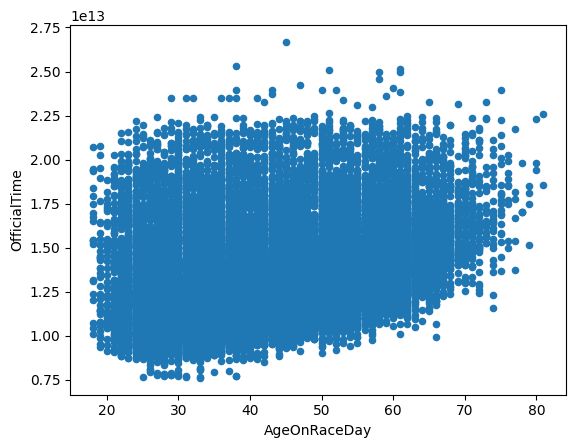

In [26]:
# prepare the data
bm_22_sc = bm_22[['AgeOnRaceDay', 'OfficialTime']].copy()

# make a scatter plot
bm_22_sc.plot(kind='scatter', x='AgeOnRaceDay', y='OfficialTime')

If the data are categorically grouped, you can slice the data into smaller data series and color them differently.  

For example, suppose we are interested in the relationship between the age and the completion time of the runners from France. 

In [27]:
# prepare the data
bm_22_sc_fm = bm_22.loc[bm_22['CountryOfResName']=='France'][['AgeOnRaceDay', 'OfficialTime', 'Gender']].copy()
bm_22_sc_fm = bm_22_sc_fm.sort_values(by='Gender').reset_index(drop=True)

# get the cutting point in the Gender column
bm_22_sc_fm.loc[bm_22_sc_fm['Gender']=='F'].tail(1)

,AgeOnRaceDay,OfficialTime,Gender
42,58,0 days 04:23:33,F


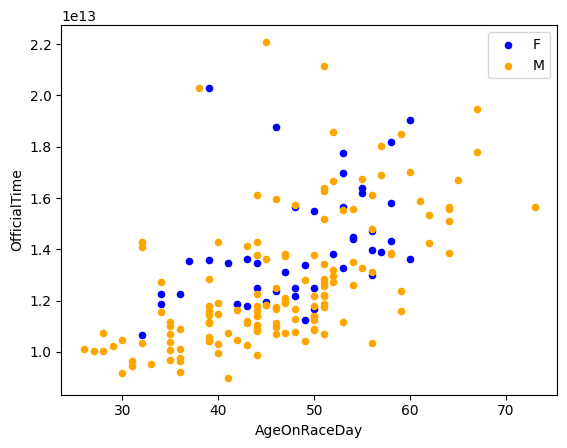

In [28]:
# make a scatter plot
ax1 = bm_22_sc_fm.loc[:42].plot(kind='scatter',
                                   x='AgeOnRaceDay',
                                   y='OfficialTime', 
                                   c='blue',label='F')

ax2 = bm_22_sc_fm.loc[43:].plot(kind='scatter',
                                   x='AgeOnRaceDay',
                                   y='OfficialTime', 
                                   c='orange',label='M', ax=ax1)

### Bar charts

In [Pandas intermediate 1](./pandas-intermediate-1.ipynb), we have plotted a bar chart showing the number of failed banks by year in the failed banks dataset. In this section, let's plot more kinds of bar charts. Suppose we would like to get the top ten non-US countries with the most runners and plot the number of runners from them in a horizontal bar chart.   

In [29]:
# prepare the data
bm_22_hbar = bm_22.groupby('CountryOfResName').size().sort_values().iloc[-11:-1]
bm_22_hbar

CountryOfResName
Ireland            172
France             183
Netherlands        185
Italy              202
Spain              258
Germany            264
Brazil             288
Mexico             393
United Kingdom    1002
Canada            1478
dtype: int64

<Axes: ylabel='CountryOfResName'>

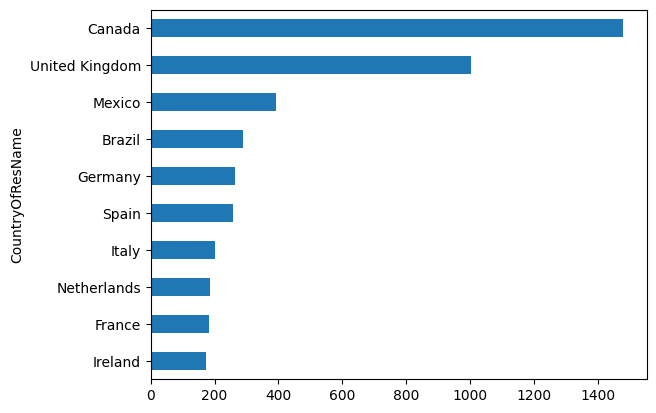

In [30]:
# make a horizontal bar chart
bm_22_hbar.plot(kind='barh')

Now, suppose we would like to break the total number of runners in each country by gender and make a stacked bar chart instead.

In [31]:
# prepare the data
bm_22_sthbar = bm_22[['CountryOfResName', 'Gender']].copy()

# get the names of the top 10 non-US countries with the most runners 
ctry = bm_22_sthbar.groupby('CountryOfResName').size().sort_values().iloc[-11:-1].index

# restructure the df for plotting
bm_22_sthbar = bm_22_sthbar.loc[bm_22_sthbar['CountryOfResName'].isin(ctry)].copy()
bm_22_sthbar = bm_22_sthbar.groupby(['CountryOfResName', 'Gender']).size().to_frame().unstack()
bm_22_sthbar.columns = bm_22_sthbar.columns.droplevel(0)
bm_22_sthbar['sum'] = bm_22_sthbar['F'] + bm_22_sthbar['M'] 
bm_22_sthbar = bm_22_sthbar.sort_values(by='sum').drop(columns='sum')

<Axes: ylabel='CountryOfResName'>

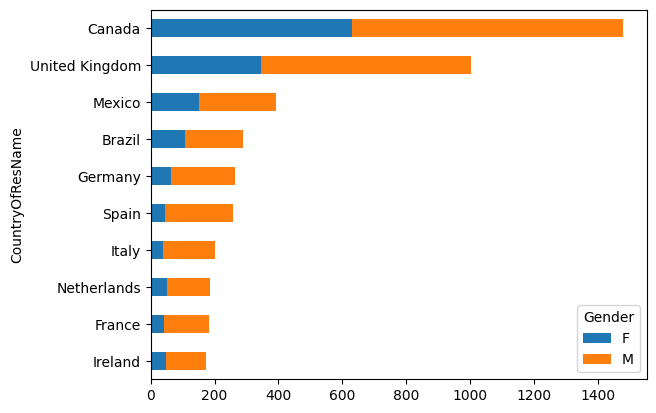

In [32]:
# make the stacked horizontal bar chart
bm_22_sthbar.plot(kind='barh', stacked=True)

<h2 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h2>

Can you plot another bar chart showing the number of female and male runners from the same ten countries but this time with the two bars for each country standing next to each other?

In [33]:
# make a bar chart showing the number of female and male runners 
# of the top non-US countries with the most runners
# with two bars for each country, one for female, one for male


## Pie chart
A pie chart is usually used to show how a total amount is divided between different levels of a categorical variable. In a pie chart, the levels of a categorical variable is represented by a slice of the pie.  

Let's make a pie chart that shows how the total number of runners are divided between the completion time in hours. 

<Axes: >

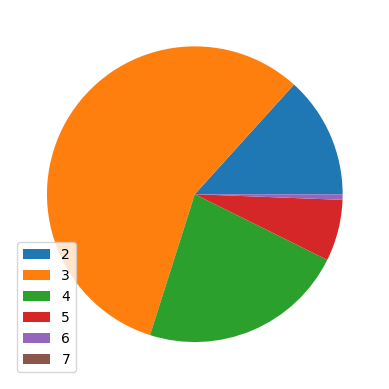

In [34]:
### prepare the data

# get the column(s) of interest
bm_22_pie = bm_22[['OfficialTime']].copy()

# create a new column containing the hours
bm_22_pie['Hour'] = bm_22_pie['OfficialTime'].dt.components['hours']

# group the data by Hour and get how many runners there are in each subgroup
bm_22_pie = bm_22_pie.groupby('Hour').size()

# make the pie chart
bm_22_pie.plot(kind='pie', labels=None, legend=True)

### Histogram

A histogram is a bar chart which shows the frequency of observations. In a histogram, the x-axis is a continuous quantitative value. The height of each bar shows the frequency of a certain range of values. The biggest difference between a bar chart and a histogram is that a bar chart has categorical values on the x-axis but a histogram has continuous quantitative values on the x-axis. 

Suppose we are interested in the distribution of the age of the runners in ranges of 10. How many runners were of age 20 - 29 at the time of race? How many were of age 30 - 39? Moreover, we would like to make a histogram that shows the distribution of age. Before we do that, can you take a guess which age group has the most runners?

In [35]:
# get the youngest and oldest age
print(bm_22['AgeOnRaceDay'].max())
print(bm_22['AgeOnRaceDay'].min())

81
18


<Axes: xlabel='Age', ylabel='Num_runners'>

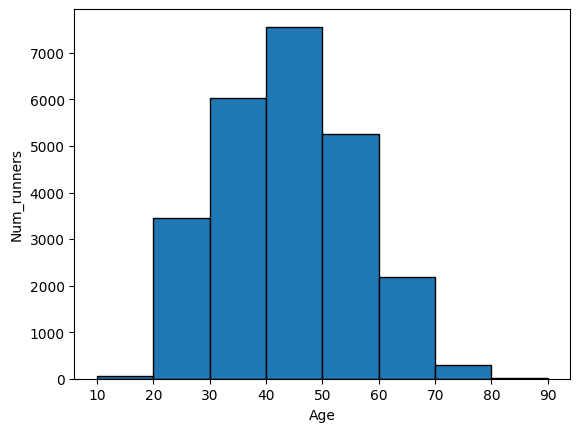

In [36]:
# prepare the data for plotting
bm_22_hist = bm_22['AgeOnRaceDay'].copy()

# make a range of bins
bins = range(10, 100, 10)

bm_22_hist.plot(kind='hist', bins=bins, edgecolor='black', xlabel='Age',ylabel='Num_runners')

In the next code cell, can you make a histogram that displays the distribution of the completion time of the runners in ranges of 1 hour? 

In [37]:
# make a histogram displaying the distribution of 
# the completion time of the runners in ranges of 1 hour


### Line graph

A line graph consists of points connected by line segments. It is commonly used to demonstrate changes in value. Oftentimes, the horizontal axis holds "time" and the vertical axis shows the change in a value of interest.

In [Pandas intermediate 1](./pandas-intermediate-1.ipynb), we made a bar chart to display the number of failed banks by year. Let's make a line graph to show the change in the number over the years in that dataset. 

<Axes: xlabel='Year'>

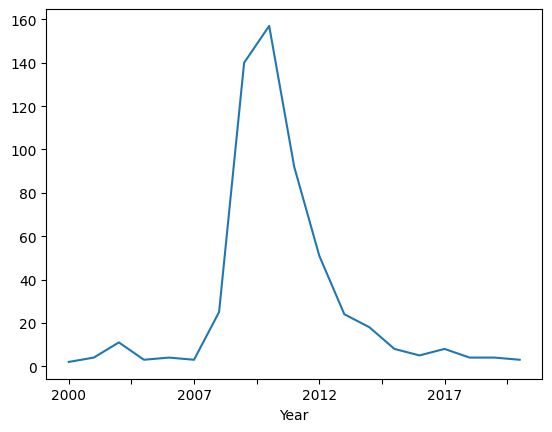

In [38]:
### prepare the data for plotting

# get the column(s) of interest
banks_line = banks_df[['Closing Date']].copy()

# create a new column containing the years
banks_line['Year'] = banks_line['Closing Date'].dt.year.astype(str)

# group the data by year and get how many banks failed in each year
banks_line = banks_line.groupby('Year').size()

# plot the line graph
banks_line.plot(xlabel='Year')

___
## Lesson Complete

Congratulations! You have completed *Pandas Intermediate 2*.

### Start Next Lesson: [Pandas intermediate 3 ->](./pandas-intermediate-3.ipynb)

### Exercise Solutions
Here are a few solutions for exercises in this lesson.

In [39]:
# get how many banks were failed in each state by year
banks_df.groupby('State').resample('Y', on='Closing Date').size()

/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T/ipykernel_87857/1017730424.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  banks_df.groupby('State').resample('Y', on='Closing Date').size()
/var/folders/2h/84wxzls579b1yv00g4jj02fh0000gn/T/ipykernel_87857/1017730424.py:2: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  banks_df.groupby('State').resample('Y', on='Closing Date').size()


State  Closing Date
AL     2009-12-31      3
       2010-12-31      1
       2011-12-31      2
       2012-12-31      1
AR     2001-12-31      1
                      ..
WV     2017-12-31      0
       2018-12-31      0
       2019-12-31      0
       2020-12-31      1
WY     2009-12-31      1
Length: 414, dtype: int64

In [40]:
# get the average completion time of the runners from the US

# Get the url to the file and download the file
import urllib.request
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv'
urllib.request.urlretrieve(url, '../data/'+url.rsplit('/')[-1][9:])
    
# Success message
print('Sample file ready.')

# create a dataframe
bm_22 = pd.read_csv('../data/BostonMarathon2022.csv')

# turn the 'OfficialTime' column to type timedelta
bm_22['OfficialTime'] = pd.to_timedelta(bm_22['OfficialTime'])

# get the average completion time of the runners in the US
bm_22.loc[bm_22['CountryOfResName']=='United States of America']['OfficialTime'].mean()

Sample file ready.


Timedelta('0 days 03:46:59.303082375')

<Axes: xlabel='CountryOfResName'>

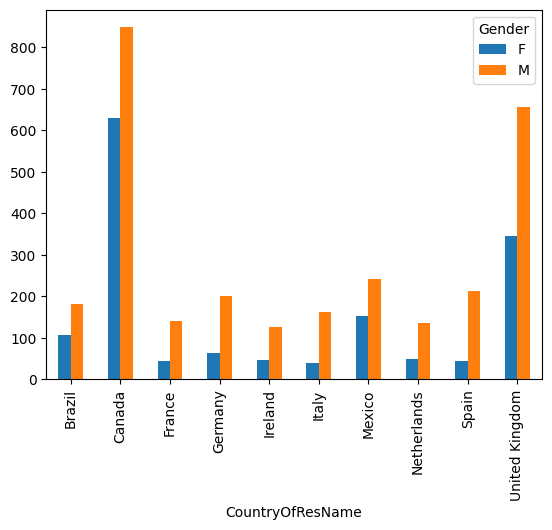

In [41]:
## create a bar chart with two bard next to each other for each country
# prepare the data
bm_22_bar_fm = bm_22[['CountryOfResName', 'Gender']].copy()

# get the names of the top 10 non-US countries with the most runners 
ctry = bm_22_bar_fm.groupby('CountryOfResName').size().sort_values().iloc[-11:-1].index

# restructure the df for plotting
bm_22_bar_fm = bm_22_bar_fm.loc[bm_22_bar_fm['CountryOfResName'].isin(ctry)].copy()
bm_22_bar_fm = bm_22_bar_fm.groupby(['CountryOfResName', 'Gender']).size().to_frame().unstack()
bm_22_bar_fm.columns = bm_22_bar_fm.columns.droplevel(0)

# plot the bar chart
bm_22_bar_fm.plot(kind='bar')

Sample file ready.


<Axes: ylabel='Num_runners'>

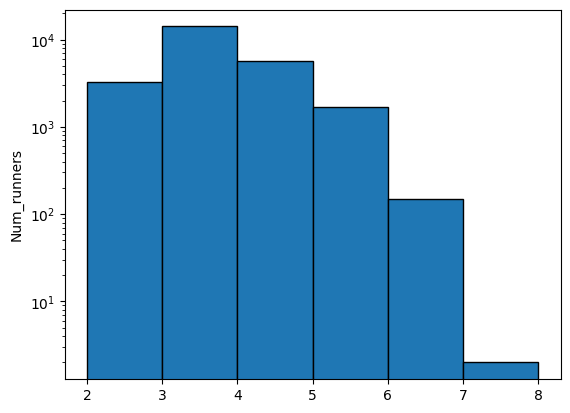

In [42]:
### make a histogram showing the distribution of completion time 
### in ranges of 1 hour

# Get the url to the file and download the file
import urllib.request
url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/DataViz3_BostonMarathon2022.csv'
urllib.request.urlretrieve(url, '../data/'+url.rsplit('/')[-1][9:])
    
# Success message
print('Sample file ready.')

# create a dataframe
bm_22 = pd.read_csv('../data/BostonMarathon2022.csv')

# get the column of interest
bm_22_time = bm_22[['OfficialTime']].copy()

# make a new column containing the hour only
bm_22_time['Hour'] = bm_22_time['OfficialTime'].str[0].astype(int)

# get the max and min value from OfficialTime
min_h = bm_22_time['Hour'].min()
max_h = bm_22_time['Hour'].max()

# make the bins
bins = range(min_h, max_h+2)

# plot the histogram
bm_22_time['Hour'].plot(kind='hist', logy=True, bins=bins, edgecolor='black', ylabel='Num_runners')